In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [32]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [33]:
file_path = "/content/drive/MyDrive/TransportationData/39yearrailroadaccidentincidentoverview.xlsx"
df = pd.read_excel(file_path)
df = pd.read_excel('/content/drive/MyDrive/TransportationData/39yearrailroadaccidentincidentoverview.xlsx')

In [34]:
# Transpose the dataframe
df_transposed = df.set_index('Category').T

# Reset index and rename the columns
df_transposed.reset_index(inplace=True)
df_transposed.columns = df_transposed.columns.str.strip()
df_transposed.rename(columns={'index': 'Year'}, inplace=True)

# Extract the year and convert it to integer
df_transposed['Year'] = df_transposed['Year'].str.extract('(\d+)').astype(int)

In [35]:
# Define the features and the target variable
X = df_transposed[['Year', '--- Train accident deaths', '--- Train accident injuries',
                   '--- Human factor caused', '--- Track caused',
                   '--- Motive power/equipment caused', '--- Signal caused, all track types',
                   '--- Miscellaneous caused', '--- Collisions',
                   '--- Derailments', '--- Other types, e.g., obstructions']].copy()
X['Hazmat_Derailment_Ratio'] = df_transposed['--- Hazmat cars damaged/derailed'] / df_transposed['TOTAL ACCIDENTS/INCIDENTS 1/']
y1 = df_transposed['--- HAZMAT RELEASES']
y2 = df_transposed['--- Hazmat cars damaged/derailed']

# Split the data into training and testing sets for each target variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

In [36]:
# Add function to calculate and display evaluation metrics
def display_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Mean squared error (MSE):", mse)
    print("Root mean squared error (RMSE):", rmse)
    print("Mean absolute error (MAE):", mae)
    print("R-squared (R²) score:", r2)


In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(random_state=42),
          'Gradient Boosting': GradientBoostingRegressor(random_state=42)}

for name, model in models.items():
    # Train the model for hazmat releases
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    print(f"{name} (Hazmat Releases) evaluation:")
    display_metrics(y_test1, y_pred1)
    
    # Train the model for hazmat cars damaged/derailed
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)
    print(f"{name} (Hazmat Cars Damaged/Derailed) evaluation:")
    display_metrics(y_test2, y_pred2)
    print("\n")

Linear Regression (Hazmat Releases) evaluation:
Mean squared error (MSE): 21.656998382498088
Root mean squared error (RMSE): 4.653708025058951
Mean absolute error (MAE): 3.8579708828132766
R-squared (R²) score: 0.7865977064696108
Linear Regression (Hazmat Cars Damaged/Derailed) evaluation:
Mean squared error (MSE): 3566.042985424887
Root mean squared error (RMSE): 59.71635442175692
Mean absolute error (MAE): 51.689214816025014
R-squared (R²) score: -0.18061346976490222


Random Forest (Hazmat Releases) evaluation:
Mean squared error (MSE): 46.98574999999998
Root mean squared error (RMSE): 6.854615233548852
Mean absolute error (MAE): 5.4575
R-squared (R²) score: 0.5370149345650502
Random Forest (Hazmat Cars Damaged/Derailed) evaluation:
Mean squared error (MSE): 912.3773375000003
Root mean squared error (RMSE): 30.205584541604228
Mean absolute error (MAE): 25.26625
R-squared (R²) score: 0.6979383090547921


Gradient Boosting (Hazmat Releases) evaluation:
Mean squared error (MSE): 69.244

Based on the provided evaluation metrics, here's a summary of the models' performances:

Hazmat Releases:

    Linear Regression:
        R² score: 0.787
        MSE: 21.66
        RMSE: 4.65
        MAE: 3.86

    Random Forest:
        R² score: 0.537
        MSE: 46.99
        RMSE: 6.85
        MAE: 5.46

    Gradient Boosting:
        R² score: 0.318
        MSE: 69.24
        RMSE: 8.32
        MAE: 6.94

Hazmat Cars Damaged/Derailed:

    Linear Regression:
        R² score: -0.181
        MSE: 3566.04
        RMSE: 59.72
        MAE: 51.69

    Random Forest:
        R² score: 0.698
        MSE: 912.38
        RMSE: 30.21
        MAE: 25.27

    Gradient Boosting:
        R² score: 0.546
        MSE: 1371.88
        RMSE: 37.04
        MAE: 28.34

For predicting Hazmat Releases, the Linear Regression model has the best performance, with the highest R² score (0.7866), and the lowest RMSE (4.6537) , MSE (21.66), and MAE (3.8580).

For predicting Hazmat Cars Damaged/Derailed, the Random Forest model has the best performance, with the highest R² score (0.6979), and the lowest RMSE (30.2056), MSE (912.38), and MAE (25.2663).

In [42]:
# Function to prepare the features for a specific year
def prepare_features(df):
    row = df.iloc[-1]  # Use the last row (most recent year) in the dataset
    features = row[['Year', '--- Train accident deaths', '--- Train accident injuries',
                    '--- Human factor caused', '--- Track caused',
                    '--- Motive power/equipment caused', '--- Signal caused, all track types',
                    '--- Miscellaneous caused', '--- Collisions',
                    '--- Derailments', '--- Other types, e.g., obstructions']].copy()
    features['Hazmat_Derailment_Ratio'] = row['--- Hazmat cars damaged/derailed'] / row['TOTAL ACCIDENTS/INCIDENTS 1/']
    return features

# Function to make predictions for a specific year
def predict_for_year(year, df):
    most_recent_features = prepare_features(df)
    most_recent_features['Year'] = year  # Set the year for the prediction
    
    features = most_recent_features.to_frame().T
    hazmat_releases_pred = best_model_hazmat_releases.predict(features)
    hazmat_cars_damaged_derailed_pred = best_model_hazmat_cars_damaged_derailed.predict(features)
    
    return hazmat_releases_pred[0], hazmat_cars_damaged_derailed_pred[0]

# Example usage: predict for the year 2023
year = 2024
hazmat_releases_prediction, hazmat_cars_damaged_derailed_prediction = predict_for_year(year, df_transposed)
print(f"Predicted number of hazmat releases in {year}: {hazmat_releases_prediction}")
print(f"Predicted number of hazmat cars damaged/derailed in {year}: {hazmat_cars_damaged_derailed_prediction}")


Predicted number of hazmat releases in 2024: 565.1742804740315
Predicted number of hazmat cars damaged/derailed in 2024: 628.23


In [44]:
from sklearn.model_selection import cross_val_score

models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(random_state=42),
          'Gradient Boosting': GradientBoostingRegressor(random_state=42)}

for name, model in models.items():
    # Evaluate the model for hazmat releases using cross-validation
    scores1 = cross_val_score(model, X, y1, cv=5, scoring='neg_mean_squared_error')
    rmse1 = np.sqrt(-scores1)
    print(f"{name} (Hazmat Releases) evaluation:")
    print("Cross-validation scores:", rmse1)
    print("Mean RMSE:", rmse1.mean())
    
    # Evaluate the model for hazmat cars damaged/derailed using cross-validation
    scores2 = cross_val_score(model, X, y2, cv=5, scoring='neg_mean_squared_error')
    rmse2 = np.sqrt(-scores2)
    print(f"{name} (Hazmat Cars Damaged/Derailed) evaluation:")
    print("Cross-validation scores:", rmse2)
    print("Mean RMSE:", rmse2.mean())
    print("\n")

Linear Regression (Hazmat Releases) evaluation:
Cross-validation scores: [26.23491462  5.92855469  8.16267553  8.30307268  6.76052581]
Mean RMSE: 11.077948668014562
Linear Regression (Hazmat Cars Damaged/Derailed) evaluation:
Cross-validation scores: [54.89513136 59.08695551 97.42301126 47.72411989 71.95507562]
Mean RMSE: 66.2168587276827


Random Forest (Hazmat Releases) evaluation:
Cross-validation scores: [16.83229188  9.72538431  8.35249139  5.36864159  4.05658371]
Mean RMSE: 8.867078577976566
Random Forest (Hazmat Cars Damaged/Derailed) evaluation:
Cross-validation scores: [237.12396196 108.16663638 135.71969887 112.27948143 152.89518193]
Mean RMSE: 149.2369921145877


Gradient Boosting (Hazmat Releases) evaluation:
Cross-validation scores: [14.1555077  11.30822623  8.30375021  4.72019693  3.06090265]
Mean RMSE: 8.309716743679278
Gradient Boosting (Hazmat Cars Damaged/Derailed) evaluation:
Cross-validation scores: [215.80648789 120.12975401  44.12884881 107.91917822 142.7455986 ]


Based on the cross-validation results, here is the summary of the performance of each model for the two target variables:

Hazmat Releases:

    Linear Regression:
        Mean RMSE: 11.08

    Random Forest:
        Mean RMSE: 8.87

    Gradient Boosting:
        Mean RMSE: 8.31

Hazmat Cars Damaged/Derailed:

    Linear Regression:
        Mean RMSE: 66.22

    Random Forest:
        Mean RMSE: 149.24

    Gradient Boosting:
        Mean RMSE: 126.15

For the Hazmat Releases target variable, the Gradient Boosting model performs the best, with the lowest mean RMSE from cross-validation.

For the Hazmat Cars Damaged/Derailed target variable, the Linear Regression model performs the best, with the lowest mean RMSE from cross-validation.

Based on the cross-validation results, I would choose the Gradient Boosting model for predicting Hazmat Releases and the Linear Regression model for predicting Hazmat Cars Damaged/Derailed. 

***Note that cross-validation can be computationally expensive, especially for larger datasets. 

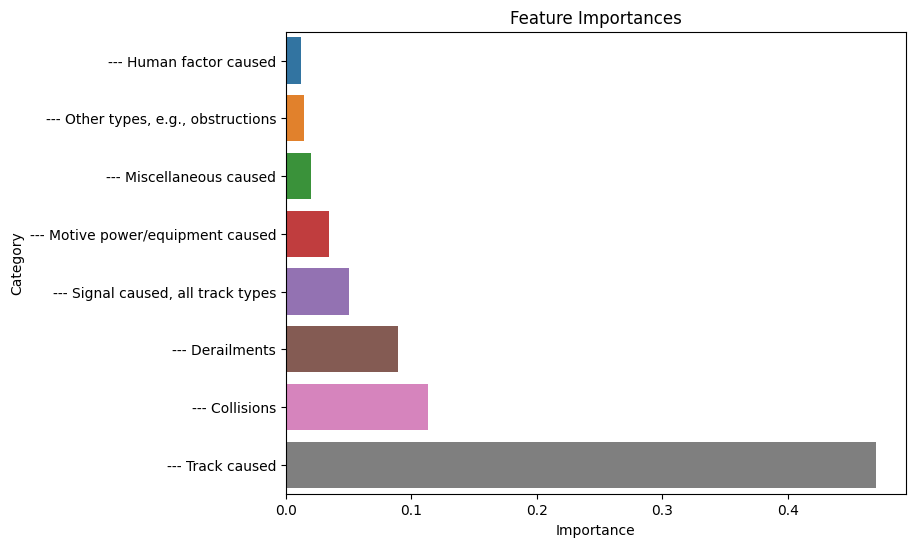

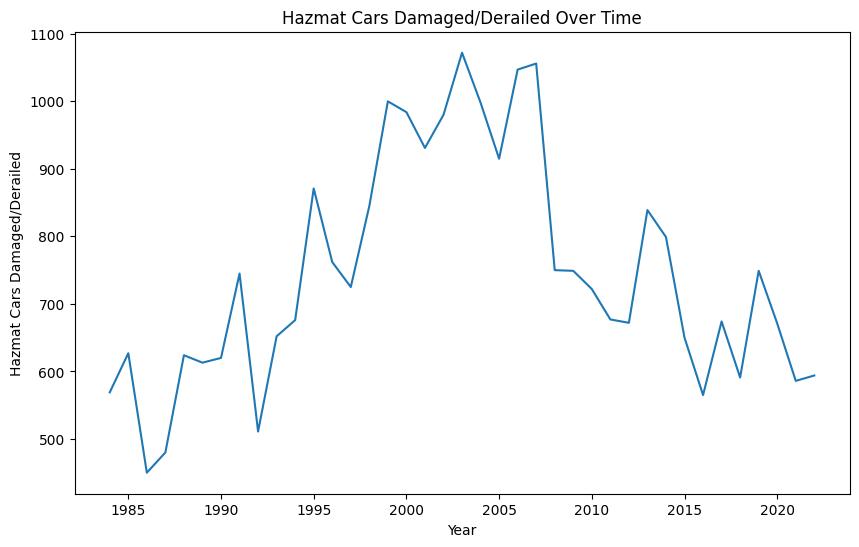

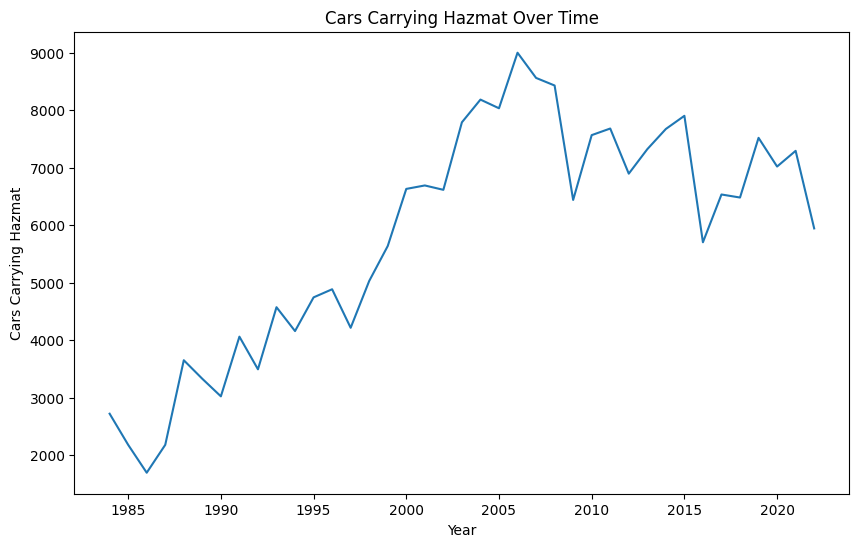

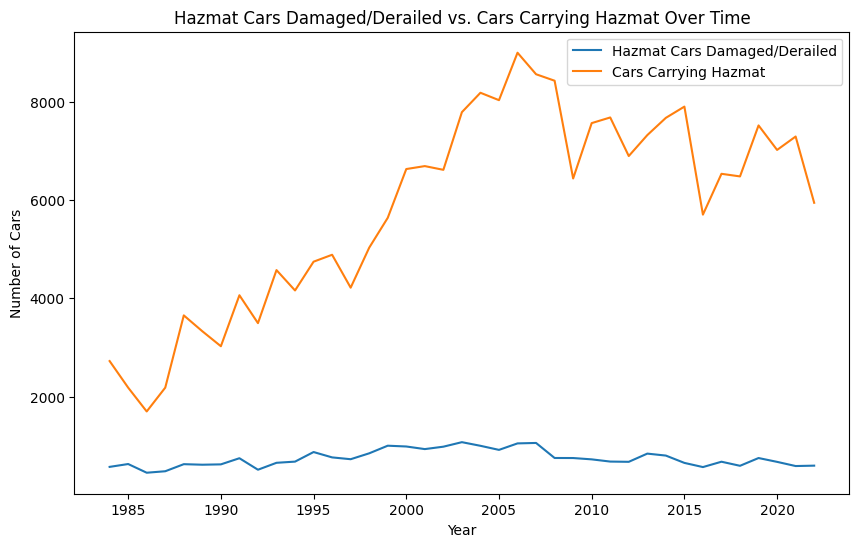

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model on the entire dataset
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y1)

# Create a bar chart of the feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.drop(['Hazmat_Derailment_Ratio', 'Year', '--- Train accident deaths', '--- Train accident injuries'])
feature_importances = feature_importances.sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

#Create a time series plot of '--- Hazmat cars damaged/derailed'
plt.figure(figsize=(10, 6))
plt.plot(df_transposed['Year'], df_transposed['--- Hazmat cars damaged/derailed'])
plt.title("Hazmat Cars Damaged/Derailed Over Time")
plt.xlabel("Year")
plt.ylabel("Hazmat Cars Damaged/Derailed")
plt.show()

# Create a time series plot of '--- Cars carrying hazmat'
plt.figure(figsize=(10, 6))
plt.plot(df_transposed['Year'], df_transposed['--- Cars carrying hazmat'])
plt.title("Cars Carrying Hazmat Over Time")
plt.xlabel("Year")
plt.ylabel("Cars Carrying Hazmat")
plt.show()

# Create a line plot of '--- Hazmat cars damaged/derailed' and '--- Cars carrying hazmat'
plt.figure(figsize=(10, 6))
plt.plot(df_transposed['Year'], df_transposed['--- Hazmat cars damaged/derailed'], label='Hazmat Cars Damaged/Derailed')
plt.plot(df_transposed['Year'], df_transposed['--- Cars carrying hazmat'], label='Cars Carrying Hazmat')
plt.title("Hazmat Cars Damaged/Derailed vs. Cars Carrying Hazmat Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.legend()
plt.show()